# Lead Scoring Case study

To identify the potential leads using 36 predictor variables to maximize the lead conversion rate and scaling up the revenue of the X education company


### Import Necessary libraries

In [1]:
## Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Import dataset

In [2]:
leads_df=pd.read_csv("leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection 

In [3]:
## Dimensions of the data
leads_df.shape

(9240, 37)

In [4]:
## Descriptive summary of the data
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preprocessing 

In [5]:
## Handling the Categorical variables which has level 'Select'
leads_df= leads_df.replace("Select",np.nan)

In [6]:
## Checking for variable types 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## Checking for missing/Null values 
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
## Percentage of Null values 
round(leads_df.isnull().sum()/len(leads_df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Many variables have high percentage of missing values and hence those with more than 40 % missing values are dropped.


In [9]:
leads_df= leads_df.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)
leads_df.shape

(9240, 30)

### Handling Missing values 

#### Variable 'Country'

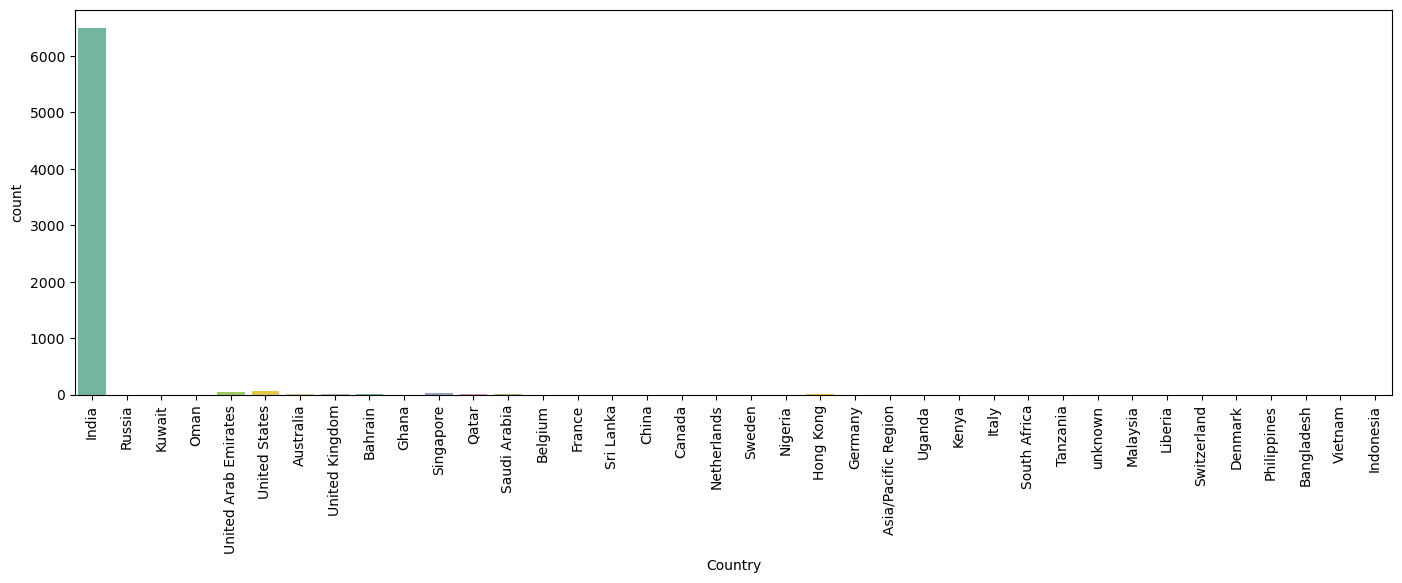

In [10]:
plt.figure(figsize=(17,5))
sns.countplot(x='Country',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [11]:
leads_df['Country']=leads_df['Country'].fillna('India')


In [12]:
leads_df['Country'].isnull().sum()

0

#### Variable 'Specialization'

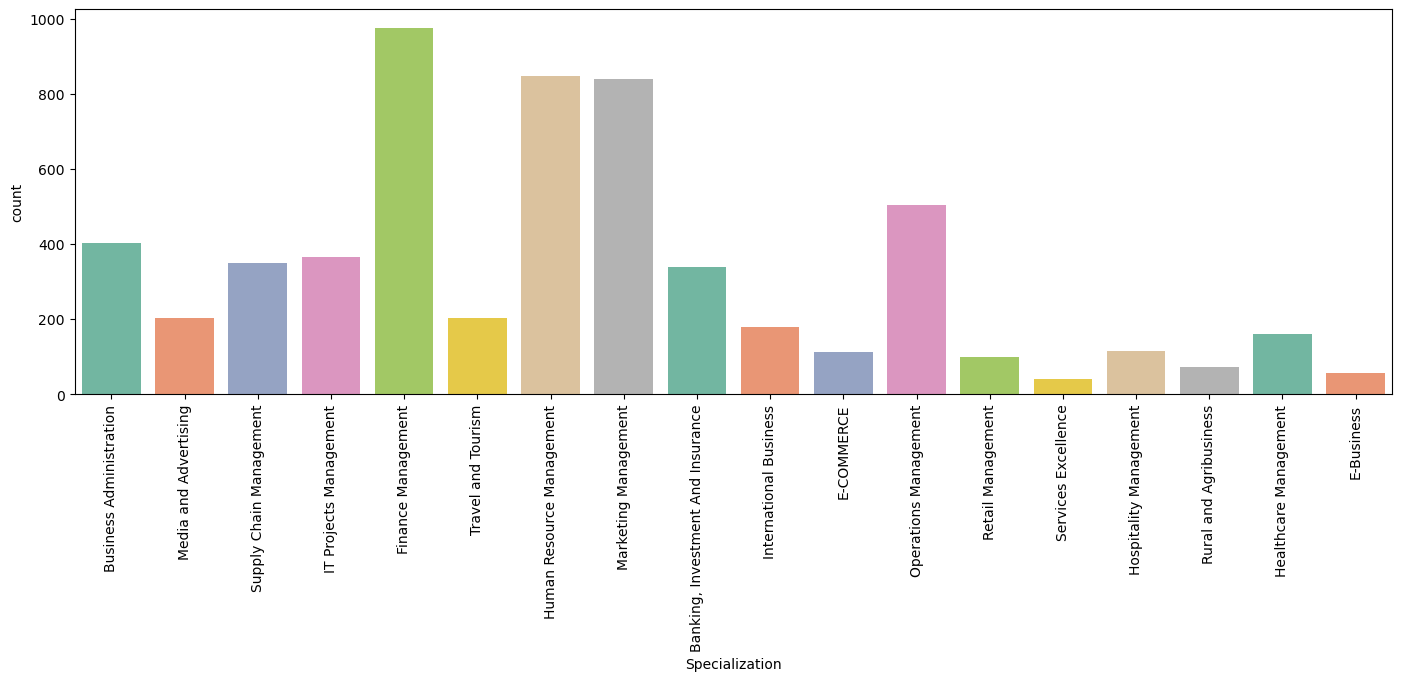

In [13]:
plt.figure(figsize=(17,5))
sns.countplot(x='Specialization',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [14]:
leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [15]:
leads_df['Specialization']=leads_df['Specialization'].fillna('Others')

#### Variable 'What is your current occupation'

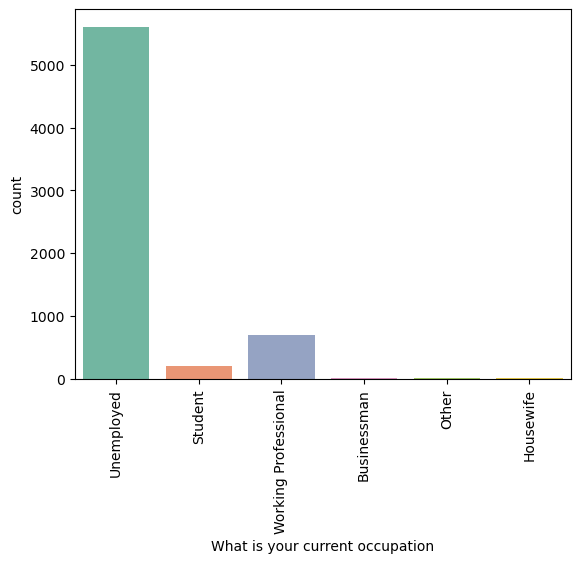

In [16]:
sns.countplot(x='What is your current occupation',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [17]:
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since most of the values are Unemployed the null values are imputed with Unemployed.

In [18]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].fillna('Unemployed')

#### Variable 'What matters most to you in choosing a course'

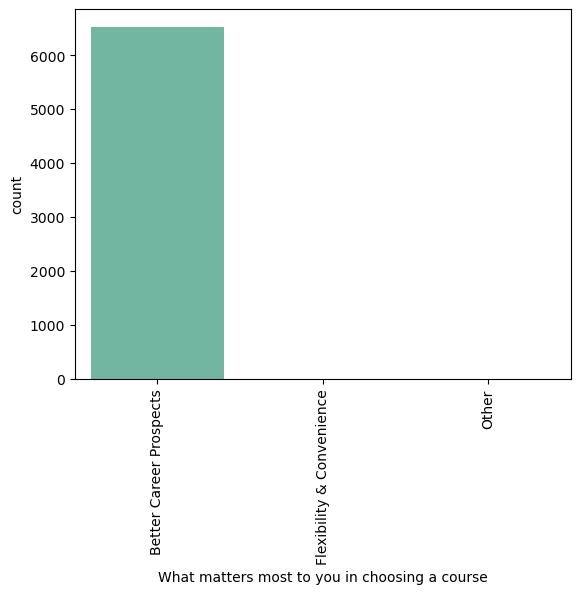

In [19]:
sns.countplot(x='What matters most to you in choosing a course',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [20]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The column is dropped due to the highly skewed distribution and the presence of large nnumber of missing values in the variable.

In [21]:
leads_df=leads_df.drop(['What matters most to you in choosing a course'],axis=1)

In [22]:
leads_df.shape

(9240, 29)

#### Variable 'Tags'

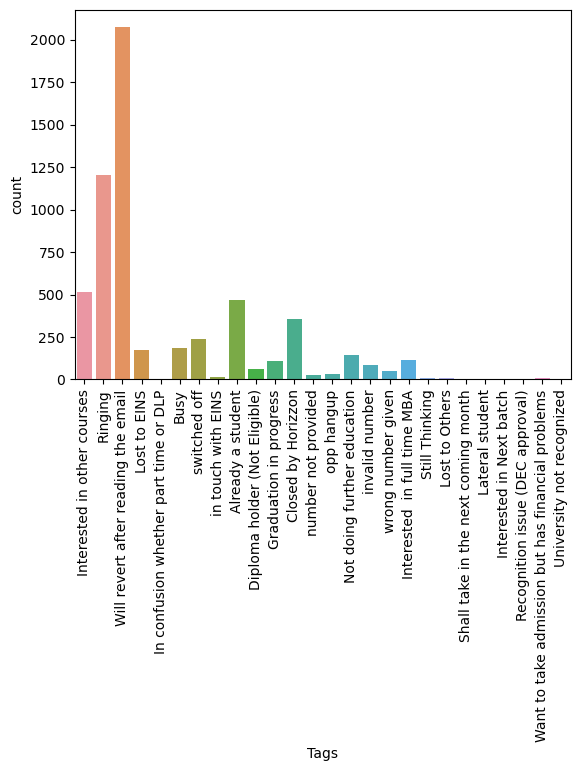

In [23]:
sns.countplot(x='Tags',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [24]:
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
leads_df['Tags']=leads_df['Tags'].fillna('Will revert after reading the email')

#### Variable 'City'

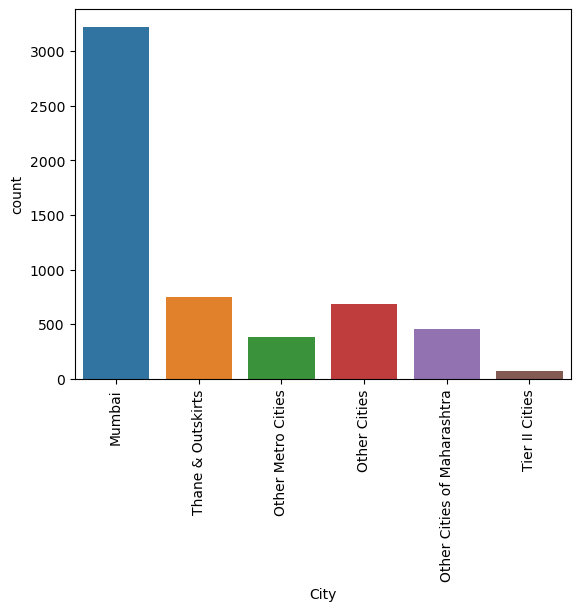

In [26]:
sns.countplot(x='City',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [27]:
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
leads_df['City']=leads_df['City'].fillna('Mumbai')

The missing values in the remaining columns are less than 2 % and hence the values are dropped 

In [29]:
leads_df.dropna(inplace=True)

In [30]:
leads_df.shape

(9074, 29)

In [31]:
## Checking Leads conversion rate
Converted=(leads_df['Converted'].sum()/len(leads_df))*100
Converted

37.85541106458012

### Data Visualization 

In [32]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [33]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

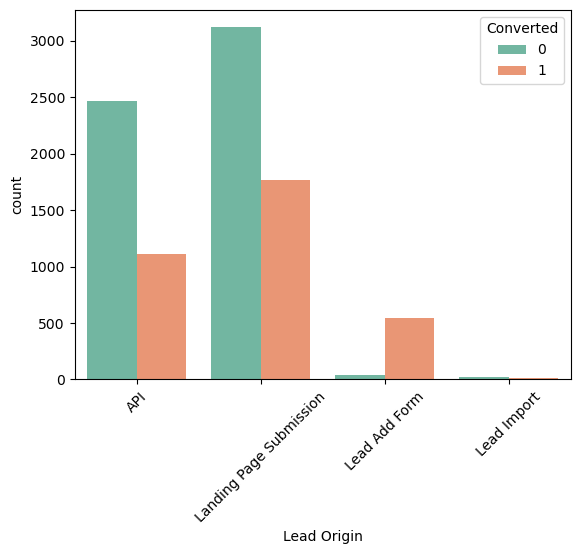

In [36]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df,palette='Set2')
plt.xticks(rotation = 45)

In [38]:
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque','Last Notable Activity']

### Bivariate plots

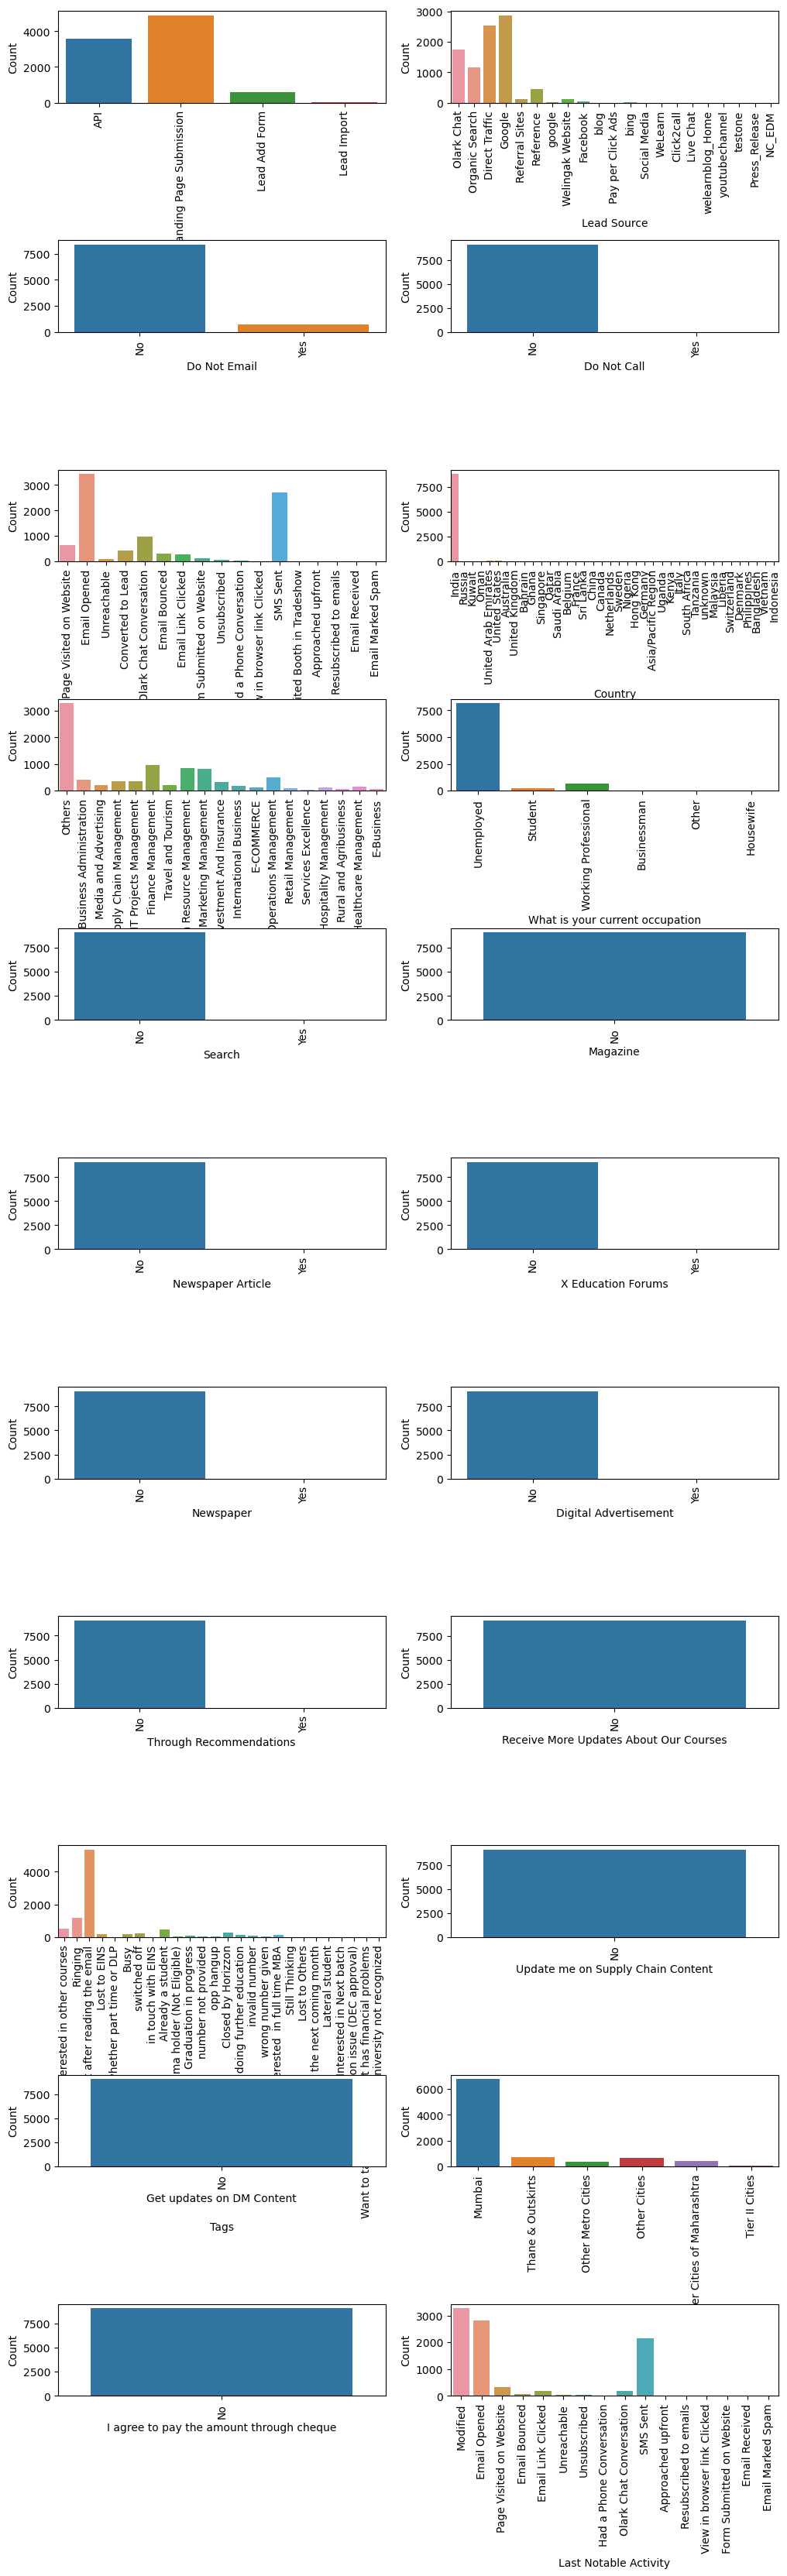

In [58]:
## Calculating number of rows and columns for the subplots
num_rows=len(cat_cols)//2
num_cols=2
## Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols,figsize=(12,40),gridspec_kw={'hspace':1.5})
axes=axes.flatten()

for i,col in enumerate(cat_cols):
    sns.countplot(x=col,data=leads_df, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)
# Hide any empty subplots
for j in range(len(cat_cols), num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [59]:
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [60]:
for column in leads_df.columns:
    print("Column:",column)
    print(leads_df[column].value_counts())
    print()

Column: Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64

Column: Lead Number
660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64

Column: Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

Column: Lead Source
Google               2868
Direct Traffic       2543
Olark Chat         